<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'> Homework 06</font></center></h1>
<h2><center> <font color='black'> Brand Value Monitoring, Fairness & Interpretability</font></center></h2>    
<h2><center> <font color='black'> MTAT.03.319 - Business Data Analytics</font></center></h2>
<h2><center> <font color='black'> University of Tartu - Spring 2021</font></center></h2>
</div>

# Homework Instructions

# Homework instructions

- Please provide the names and student IDs of the team-members (Maximum 2 person) in the field "Team mates" below. If you are not working in a team please insert only your name and student ID. 

- The accepted submission formats are Colab links or .ipynb files. If you are submitting Colab links please make sure that the privacy settings for the file is public so we can access your code. 

- The submission will automatically close on <font color='red'>**16 May at 23:59**</font>, so please make sure to submit before the deadline. 

- ONLY one of the teammates should submit the homework. We will grade the homework and the marks and feedback is applied for both the team members. So please communicate with your team member about marks and feedback if you are submit the homework.

- If a question is not clear, please ask us in Moodle ONLY. 

- After you have finished solving the Homework, please restart the Kernel and run all the cells to check if there is any persisting issues. 

- Plagiarism is <font color='red'>**PROHIBITED**</font>. Any form of plagiarism will be dealt according to the university policy (https://www.ut.ee/en/current-students/academic-fraud).


**<h2><font color='red'>Team mates:</font></h2>**


**<font color='red'>Name: Mohga Emam</font>&emsp;   <font color='red'>Student ID: C09505</font>**


**<font color='red'>Name: Rewan Emam</font>&emsp;   <font color='red'>Student ID: C07851</font>**

### The homework is divided into four sections and the points are distributed as below:
<pre>
- Brand Value Monitoring        -> 6 points
- Fairness & Interpretability   -> 4 points
__________________________________________
Total                           -> 10 points
</pre>

# 1. Brand Value Monitoring (6 points)
You are going to use two annotated datasets containing tweets about Apple stock (AAPL) and the sentiment it represents (postive, negative, neutral)

**1.1 There are two datasets with 1000 rows each. Please concatenate them together so that you have 2000 rows. (0.2 Points)**

In [ ]:
import pandas as pd
import numpy as np


a1 = pd.read_csv('https://raw.githubusercontent.com/RewanEmam/Customer-Segmentation-files/main/Apple1.csv', sep=",", encoding='latin-1') #DO NOT change the encoding method, may give you error
a2 = pd.read_csv('https://raw.githubusercontent.com/RewanEmam/Customer-Segmentation-files/main/Apple2.csv', sep= ',', encoding='latin-1') #DO NOT change the encoding method, may give you error

#Concatenate
df = pd.concat([a1, a2])
df.head()

,text,created,id,sentiment
0,RT @option_snipper: $AAPL beat on both eps and...,2017-08-01 20:31:56,8.924831e+17,positive
1,RT @option_snipper: $AAPL beat on both eps and...,2017-08-01 20:31:55,8.924831e+17,positive
2,Let's see this break all timers. $AAPL 156.89,2017-08-01 20:31:55,8.924831e+17,neutral
3,RT @SylvaCap: Things might get ugly for $aapl ...,2017-08-01 20:31:55,8.924830e+17,negative
4,$AAPL - wow! This was supposed to be a throw-a...,2017-08-01 20:31:54,8.924830e+17,neutral


In [ ]:
#test that the function is working:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       2000 non-null   object 
 1   created    2000 non-null   object 
 2   id         2000 non-null   float64
 3   sentiment  2000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 78.1+ KB


**1.2 Plot a distribution of ```sentiment``` unique values. (0.2 Points)**

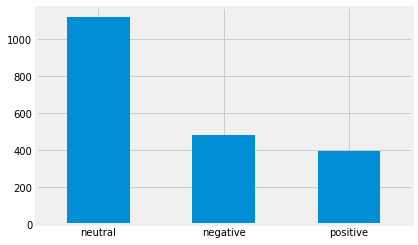

In [ ]:
# Data preprocessing then plotting a distribution of sentiment unique values for a1:

# drop unnescessary columns:
original=df.copy(deep=True)
data = df.drop(["created", "id"], axis=1)
data.head()

#define the unique values:
data["sentiment"].unique()

# Visualizing the sentiment values.
data.sentiment.value_counts().plot.bar(rot=0)

**1.3 Drop the unecessary column/s. Perform the following preprocessings to the ```text``` column. (1.6 Points)**
- change all characters to lowercase
- remove URLs
- remove words starting with ‘@’
- remove words starting with ‘$’ 
- remove punctuation
- remove stopwords
- remove numbers
- remove whitespaces
Don’t forget to inspect

In [ ]:
# separate the textual information and labels.
X=data["text"]
y=data["sentiment"]

print("Texts: ")
print(X.head())
print("Labels: ")
print(y.head())


import nltk
from nltk.corpus import stopwords

#downloading common english stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
import string

stop_words=stopwords.words('english')

#lower-casing the letters
apple_low = [item.lower() for item in a1.text.unique()]

#removing spaces between the words
apple_low_nowhitespace = [x.replace(" ", "") for x in apple_low]

#concatenating our custom stopwords list
stop_words=stop_words+apple_low+apple_low_nowhitespace

#getting list of punctuation from string package
punct=string.punctuation
stemmer=PorterStemmer()

import re
cleaned_data=[]
for i in range(len(X)):
   #making sure the sentences start with letters from a-z and A-Z or removing single characters from the start
   tweet=re.sub('[@$]'," ",X.iloc[i])
   #lowercasing
   tweet=tweet.lower().split()
   #removing stop words and punctuations
   tweet=[stemmer.stem(word) for word in tweet if (word not in stop_words) and (word not in punct)]
   #concatenating the tweet again to a sentence
   tweet=' '.join(tweet)
   cleaned_data.append(tweet)

cleaned_data[0:5]

Texts: 
0    RT @option_snipper: $AAPL beat on both eps and...
1    RT @option_snipper: $AAPL beat on both eps and...
2        Let's see this break all timers. $AAPL 156.89
3    RT @SylvaCap: Things might get ugly for $aapl ...
4    $AAPL - wow! This was supposed to be a throw-a...
Name: text, dtype: object
Labels: 
0    positive
1    positive
2     neutral
3    negative
4     neutral
Name: sentiment, dtype: object
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['rt option_snipper: aapl beat ep revenues. see 4q rev. 49b- 52b, est. 49.1b https://t.co/hfhxqj0iob',
 'rt option_snipper: aapl beat ep revenues. see 4q rev. 49b- 52b, est. 49.1b https://t.co/hfhxqj0iob',
 "let' see break timers. aapl 156.89",
 'rt sylvacap: thing might get ugli aapl iphon delay. aapl mean almost fang stock posâ\x80¦',
 'aapl wow! suppos throw-away quarter aapl beat 500 million revenue! trillion dollar compani 2018!']

In [ ]:
cleaned = re.sub(r"\$\w+[,]|\$\w+|[,]\$\w+", "", str(cleaned_data))
cleaned = re.sub(r"\$\w+[,]|\$\w+|[,]\$\w+", "", str(cleaned))
cleaned

type(cleaned_data)

cleaned_data_without = []
for i in cleaned_data:
  cleaned = re.sub(r"\$\w+[,]|\$\w+|[,]\$\w+|\$", "", i)
  cleaned = re.sub(r"\@\w+[,]|\@\w+|[,]\@\w+|\@", "", cleaned)
  cleaned = re.sub(r"http\S+", "", cleaned)
  cleaned = re.sub(r"aapl", "", cleaned)
  cleaned = re.sub(r"https:\S+", "", cleaned)
  cleaned_data_without.append(cleaned)
cleaned_data_without

['rt option_snipper:  beat ep revenues. see 4q rev. 49b- 52b, est. 49.1b ',
 'rt option_snipper:  beat ep revenues. see 4q rev. 49b- 52b, est. 49.1b ',
 "let' see break timers.  156.89",
 'rt sylvacap: thing might get ugli  iphon delay.  mean almost fang stock posâ\x80¦',
 ' wow! suppos throw-away quarter  beat 500 million revenue! trillion dollar compani 2018!',
 'rt cnbcnow: earnings: appl q3 ep 1.67 vs. 1.57 est.; q3 revs. 45.4b vs. 44.89b est. â\x80¢   ',
 'rt cnbcnow: earnings: appl q3 ep 1.67 vs. 1.57 est.; q3 revs. 45.4b vs. 44.89b est. â\x80¢   ',
 'rt selerity: #breaking: appl  q3 earn per share (eps), 1.67 vs. 1.57 expect',
 'rt selerity: #breaking: appl  q3 revenue, 45.41b vs. 44.9b expect',
 'rt jackwangcfa: #appl appl  #earn #realtim #break rev 45.4b &amp; ep 1.67 vs #street #consensu #estim 44.9b; ep 1â\x80¦',
 'rt selerity: #breaking: appl  q3 iphon shipments, 41.03m vs. 40.5m expect',
 ' probabl tank tomorrow lol',
 ' actual 1.67 e, 45.4 b rev ',
 'rt super1nyc:  appl r

**1.4 Create wordclouds for each sentiment group. Find out the most frequent word for each group. You should have three plot for three sentiment groups. (1.5 Points)**

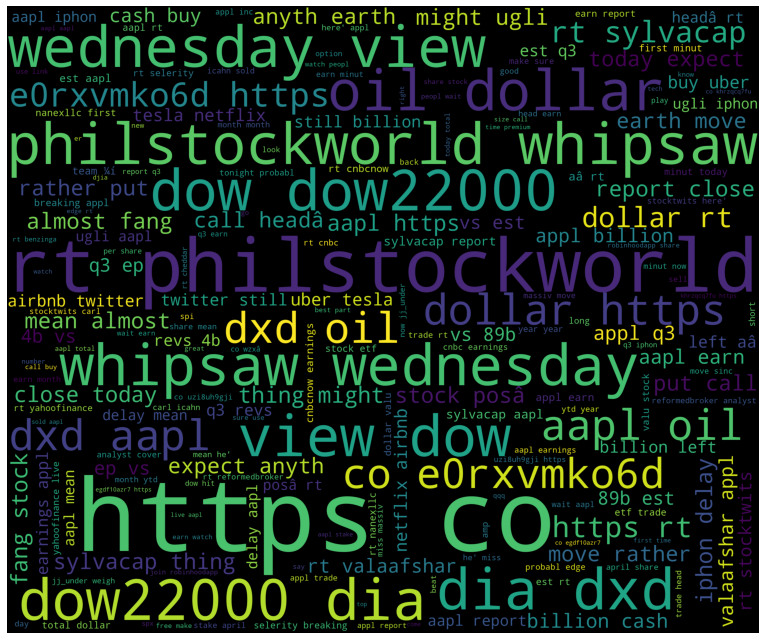

In [ ]:
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt

new_df=data[data['text']=='United']

new_df=data.text
united_sent=cleaned_data_without
for i in range(len(new_df)):
   #making sure the sentences start with letters from a-z and A-Z or removing single characters from the start
   tweet=re.sub('[@$]'," ",new_df.iloc[i])

   #lowercasing
   tweet=tweet.lower().split()
   #removing stop words and punctuations
   tweet=[stemmer.stem(word) for word in tweet if (word not in stop_words) and (word not in punct)]
   #concatenating the tweet again to a sentence
   tweet=' '.join(tweet)
   united_sent.append(tweet)

cleaned_word = " ".join([word for word in united_sent])

wordcloud = WordCloud(background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

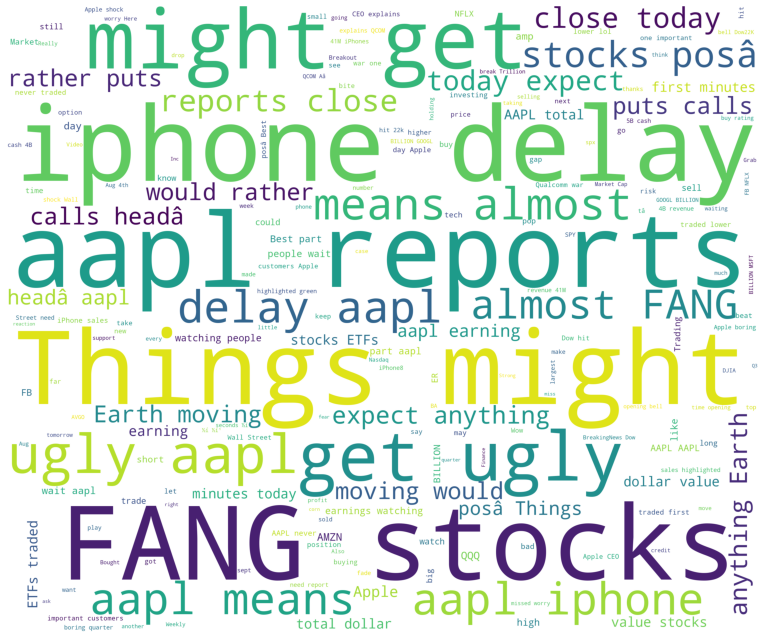

In [ ]:
import matplotlib.pyplot as plt
new_df=data[data['text']=='United']
new_df=data[data['sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=stop_words,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

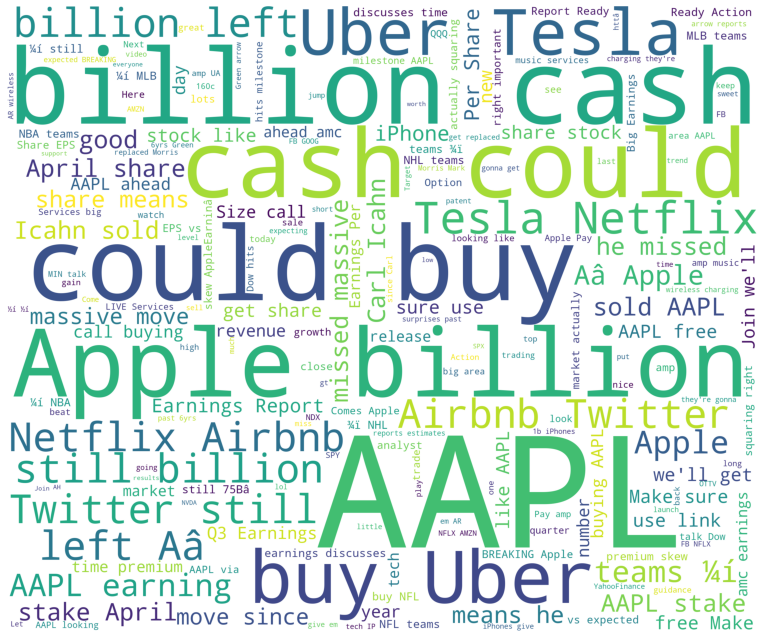

In [ ]:
import matplotlib.pyplot as plt
new_df=data[data['text']=='United']
new_df=data[data['sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=stop_words,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**1.5 Apply TF-IDF technique on the textual data and split the dataset between train and test (80/20 ratio) (1.0 Points)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 

tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stop_words)  
X = tfidfconverter.fit_transform(cleaned_data).toarray()

pd.DataFrame(X, columns = tfidfconverter.get_feature_names())

#Split
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**1.6 Train a random forest model with the prepared data and show the classification report on the test data (0.5 Points)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(X_train, y_train)
 
 
predictions = text_classifier.predict(X_test)
 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))


[[ 73  21   6]
 [  8 220   6]
 [  2  15  49]]
              precision    recall  f1-score   support

    negative       0.88      0.73      0.80       100
     neutral       0.86      0.94      0.90       234
    positive       0.80      0.74      0.77        66

    accuracy                           0.85       400
   macro avg       0.85      0.80      0.82       400
weighted avg       0.86      0.85      0.85       400

0.855


**1.7 Train an SVM model with the prepared data and show the classification report on the test data (0.5 Points)**

In [ ]:
from sklearn.svm import SVC
text_classifier = SVC()
text_classifier.fit(X_train, y_train)
 
predictions = text_classifier.predict(X_test)
 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))

[[ 72  25   3]
 [  5 228   1]
 [  1  17  48]]
              precision    recall  f1-score   support

    negative       0.92      0.72      0.81       100
     neutral       0.84      0.97      0.90       234
    positive       0.92      0.73      0.81        66

    accuracy                           0.87       400
   macro avg       0.90      0.81      0.84       400
weighted avg       0.88      0.87      0.87       400

0.87


**1.8 Which model performed better? Consider the f1 metrics and the time it took to train the model. Which model would you use in a real-life scenario and why? (0.5 Points)**

**<font color='red'>Answer: The model we prefer is the SVM method as it has more accuracy than the Forest Model model. The random forest accuracy is: 0.855 and when it comes to the accuracy of the SVM forest is: 0.87</font>**

# 2. Fairness & Interpretability ( 4 points)

In this section you are going to use the standard German Credit dataset used to bechmark many model interpretability techniques. The daset contains 1000 records of loan applications associatid with a risk score: Good or Bad.

In [ ]:
# Load necessary dependencies

!pip install eli5
!pip install shap

**2.1 The dataset has empty values. Choose an imputation method of your choice for each column. (0.5 points)**

In [ ]:
import pandas as pd
import numpy as np

# upload the "model_evaluation_utils.py" file to your notebook before running this cell, you can find it in Moodle.


import matplotlib.pyplot as plt
from collections import Counter
import shap
import eli5

import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

shap.initjs()

In [ ]:
#!pip install sklearn_pandas
from sklearn_pandas import CategoricalImputer
import pandas as pd
german_data = pd.read_csv('https://raw.githubusercontent.com/RewanEmam/Customer-Segmentation-files/main/german_credit_data.csv', sep=',')

# We pick to convert the na values with 0. This's considered as one of the Imputation methods.
german_data = german_data.fillna(0)
german_data.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,0,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,0,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


**2.2 Plot the values of the column ```Age``` against the ```Risk``` column. Do you think there exist  bias in this dataset? Choose the appropriate plot to address the problem. (0.5 points)**

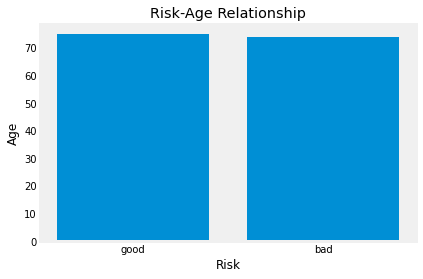

In [ ]:
#Since we need to show the relationship between 2 variables, then we pick the bar chart based on the Charrt suggestions from Lecture 2

plt.bar(german_data['Risk'], german_data['Age'])
plt.grid()
plt.xlabel('Risk')
plt.ylabel('Age')
plt.title('Risk-Age Relationship')
plt.show()

<font color='red'> **Answer: The relationship between the age & risk needs other features to be explained carefull. I can determine any kind of decision based on these 2 variables..** 

**2.3 Perform label encoding. Split the dataset in train/test (80/20 ratio) set, keep the random state 99. Train the XGBoost classifier below and predict the results in test set. Plot the classifcation report. (0.5 points)**

In [ ]:
# german_data contains int & float, so inorder to use XGBoost, which is suitable method for categorical data. I need to fix my dataset a little bit!
df = german_data.astype('category')

cat_cols = df.select_dtypes(['category']).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.cat.codes)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,48,1,2,1,0,1,142,2,5,1
1,3,0,2,1,1,2,770,29,5,0
2,30,1,1,1,1,0,390,8,3,1
3,26,1,2,0,1,1,848,26,4,1
4,34,1,2,0,1,1,734,17,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1000 non-null   int8 
 1   Sex               1000 non-null   int8 
 2   Job               1000 non-null   int8 
 3   Housing           1000 non-null   int8 
 4   Saving accounts   1000 non-null   int8 
 5   Checking account  1000 non-null   int8 
 6   Credit amount     1000 non-null   int16
 7   Duration          1000 non-null   int8 
 8   Purpose           1000 non-null   int8 
 9   Risk              1000 non-null   int8 
dtypes: int16(1), int8(9)
memory usage: 10.9 KB


In [ ]:
#define lables
df, labels = shap.datasets.adult(display=True)
print(labels)
labels = np.array([int(label) for label in labels])
df.shape, labels.shape

Counter(labels)

# encoded data set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=99)
X_train.shape, X_test.shape

import xgboost as xgb

X_train.head(2)

[False False False ... False False  True]


,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
24643,53.0,Private,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,46.0,United-States
17622,40.0,Private,16.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,60.0,United-States


In [ ]:
X_train[['Age','Education-Num', 'Capital Gain','Capital Loss', 'Hours per week']]

,Age,Education-Num,Capital Gain,Capital Loss,Hours per week
24643,53.0,9.0,0.0,0.0,46.0
17622,40.0,16.0,0.0,0.0,60.0
31313,38.0,4.0,0.0,0.0,30.0
16784,47.0,4.0,0.0,0.0,40.0
30689,27.0,13.0,0.0,0.0,68.0
...,...,...,...,...,...
9929,22.0,10.0,0.0,0.0,55.0
3240,34.0,10.0,0.0,0.0,40.0
13497,58.0,13.0,0.0,0.0,50.0
23587,40.0,10.0,0.0,0.0,50.0


In [ ]:
# Original data set
data_disp, labels_disp = shap.datasets.adult(display=True)
X_train_disp, X_test_disp, y_train_disp, y_test_disp = train_test_split(data_disp, labels_disp, test_size=0.2)

#visulaize the data: train_test_split(data_disp, labels_disp, test_size=0.2)
X_train_disp.head(3)

from xgboost import XGBClassifier

xgc = xgb.XGBClassifier(n_estimators=500, max_depth=5, base_score=0.5,
                        objective='binary:logistic', random_state=42)

# print('xtrain: ',X_train)
# print('ytrain: ', y_train)

xgc.fit(X_train[['Age','Education-Num', 'Capital Gain','Capital Loss', 'Hours per week']], y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

**2.4 Plot 3 types of feature importance (the parameter importance_type='weight', 'gain', 'cover') given by XGBoost and interpret the results. (0.5 points)**

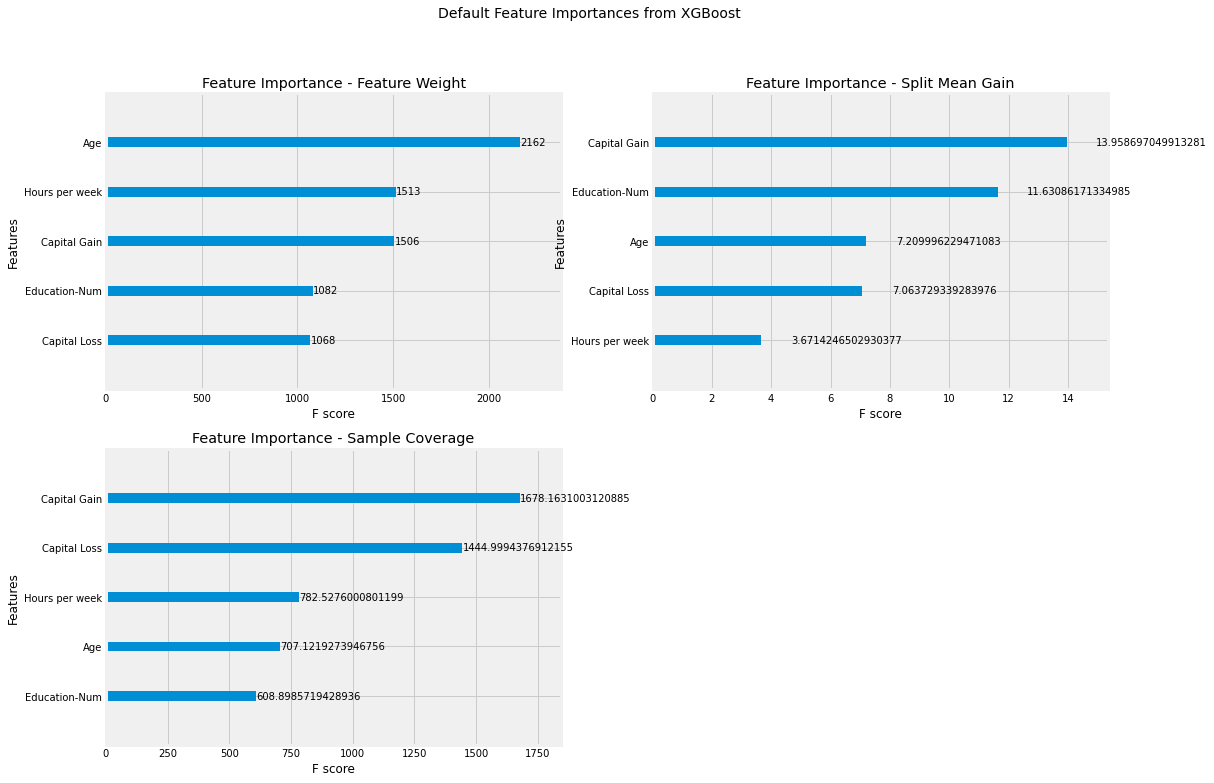

In [ ]:
#Example: xgb.plot_importance(..., importance_type='weight', ...)
#Example: xgb.plot_importance(..., importance_type='gain', ...)
#Example: xgb.plot_importance(..., importance_type='cover', ...)

fig = plt.figure(figsize = (16, 12))
title = fig.suptitle("Default Feature Importances from XGBoost", fontsize=14)

ax1 = fig.add_subplot(2,2, 1)
xgb.plot_importance(xgc, importance_type='weight', ax=ax1)
t=ax1.set_title("Feature Importance - Feature Weight")

ax2 = fig.add_subplot(2,2, 2)
xgb.plot_importance(xgc, importance_type='gain', ax=ax2)
t=ax2.set_title("Feature Importance - Split Mean Gain")

ax3 = fig.add_subplot(2,2, 3)
xgb.plot_importance(xgc, importance_type='cover', ax=ax3)
t=ax3.set_title("Feature Importance - Sample Coverage")

<font color='red'> **Answer: After visulaizing the model, it's crucial to mention its role, which enables us to view the feature importances based on the features [gain - weghts - coverage]. The factors contridict all in all, which motivates the use of model interpretation frameworks like SHAP which uses something known as SHAP values, which claim to come with consistency guarantees (meaning they will typically order the features correctly).**


**2.5 Use eli5 to analyze the most important features of a sample where the credit score is Bad and another sample where the credit score is Good. Explain briefly the results (0.5 points)**

In [ ]:
!pip install eli5
import eli5

eli5.show_weights(xgc.get_booster())

Weight,Feature
0.3206,Capital Gain
0.2672,Education-Num
0.1656,Age
0.1623,Capital Loss
0.0843,Hours per week


In [ ]:
# when the credit score is good

doc_num = 0
print('Actual Label:', y_test[doc_num])
print('Predicted Label:', predictions[doc_num])
eli5.show_prediction(xgc.get_booster(), X_test.iloc[doc_num], feature_names=list(data.columns) ,show_feature_values=True)

# when the credit score is bad

doc_num = 0
print('Actual Label:', y_test[doc_num])
print('Predicted Label:', predictions[doc_num])
eli5.show_prediction(xgc.get_booster(), X_test.iloc[doc_num], 
                     feature_names=list(data.columns) ,show_feature_values=True)

[link text](https://)<font color='red'> **Answer: When the crdit score is good, we can see that the most influential features are [Age - Capital Loss - Capital gain - Eductaion num]. However, when it comes to the most influential features while the credit score is bad, we can see: [Hours per week - Capital gain - education num] It's important that the same features can be useful in both directions.** 

**2.6 Use SHAP to explain the prediction of the model for a sample where the credit score is Bad and another sample where the credit score is Good. Explain briefly the results.(0.5 points)**

In [ ]:
!pip install shap
import shap


In [ ]:
X_test[['Age','Education-Num', 'Capital Gain','Capital Loss', 'Hours per week']]

,Age,Education-Num,Capital Gain,Capital Loss,Hours per week
31850,54.0,10.0,0.0,0.0,40.0
3537,81.0,9.0,0.0,0.0,20.0
9258,26.0,7.0,0.0,0.0,40.0
20399,60.0,10.0,0.0,0.0,40.0
13644,47.0,13.0,0.0,0.0,40.0
...,...,...,...,...,...
21440,31.0,12.0,0.0,0.0,40.0
1907,26.0,14.0,0.0,0.0,50.0
17378,36.0,13.0,2176.0,0.0,20.0
26910,23.0,9.0,2597.0,0.0,40.0


In [ ]:
explainer = shap.TreeExplainer(xgc)
shap_values = explainer.shap_values(X_test[['Age','Education-Num', 'Capital Gain','Capital Loss', 'Hours per week']])

#explain the predictions with SHAP
pd.DataFrame(shap_values).head()

,0,1,2,3,4
0,0.826862,-0.061801,-0.152009,-0.064414,-0.044595
1,-0.959299,-0.754738,-0.165201,-0.070105,-1.411575
2,-1.188901,-1.386659,-0.175671,-0.060684,-0.106272
3,0.582870,-0.059392,-0.152083,-0.067156,-0.067718
4,0.781126,0.776655,-0.141228,-0.091593,-0.054863


In [ ]:
print('Expected Value:', explainer.expected_value)

Expected Value: -1.3042232


In [ ]:
# when the credit score is good
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test_disp[['Age','Education-Num', 'Capital Gain','Capital Loss', 'Hours per week']].iloc[0,:])


# when the credit score is bad


shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[2,:], X_test_disp[['Age','Education-Num', 'Capital Gain','Capital Loss', 'Hours per week']].iloc[2,:])

<font color='red'> **Answer: So as you can see from the graph, as it spots light on the most influential features of the model, wich helps later while taking the decision. so the Education num, age, capital gain are the features that shows lower prediction.**


**2.7 Use SHAP to explain the prediction of the model for  the first 250 samples. Based on the similar patterns explain briefly the results(0.5 points)**

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:250,:], X_test_disp[['Age','Education-Num', 'Capital Gain','Capital Loss', 'Hours per week']].iloc[:250,:])

<font color='red'> **Answer: The above visualization can be interacted with in multiple ways. The default visualization shows some interesting model prediction pattern decisions.

- The first 28 test samples all probably __earn less than \$10K__ and they __are in age between 30 & 56__ or\and have a __good education num.

- The next 130+ test samples all probably __earn less than or equal to \$10K__ and they __are mostly younger than 30__ and\or are __very young in age or very old__!
- The next 30+ test samples have an inclination towards mostly __capital gain close to 0__ and they are of diverse profiles including married folks, people with different age and education levels and occupation. Most dominant features pushing the model towards making a prediction for higher income is the person i.e. __relationship: unknown__!
- The remaining 400+ test samples have an inclination towards mostlyinformation aren't based on a certain path as the age range differs between so young to so old, education num as well.

Definitely interesting how we can find out patterns which lead to the model making specific decisions and being able to provide explanations for them.** 

**2.8 Plot as a bar chart of the feature importances received from SHAP. Finally compare these results  with the result from 2.6 and 2.7. (0.5 points)**

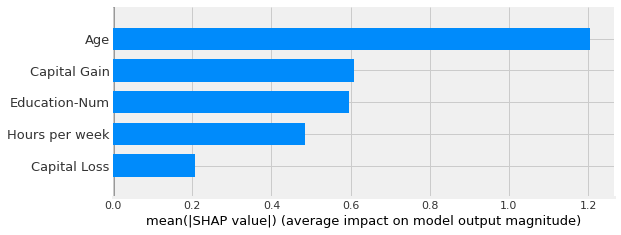

In [ ]:
shap.summary_plot(shap_values, X_test[['Age','Education-Num', 'Capital Gain','Capital Loss', 'Hours per week']], plot_type="bar")

<font color='red'> **Answer: definately age feature reflects a true useful value in all the previous graphs. Although the capital gain didn't add much in several cases. But we witnessed that Education num & hours per week are vital features in all graphs.** 



## How long did it take you to solve the homework?

* Please answer as precisely as you can. It does not affect your points or grade in any way. It is okay, if it took 0.5 hours or 24 hours. The collected information will be used to improve future homeworks.

<font color='red'> **Answer:**</font> 



## What is the level of difficulty for this homework?
you can put only number between $0:10$ ($0:$ easy, $10:$ difficult)

<font color='red'> **Answer:** </font>